# Heart Attack Prediction Model

## Required Packages

In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Importing Heart Dataset From CSV File

In [215]:
dataset = pd.read_csv('./heart.csv')
dataset.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Exploratory Data Analysis

### Correlation Matrix

In [216]:
corr_mat = dataset.drop(['output'],axis=1).corr()
corr_mat

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244


## Correlation Matrix Heatmap

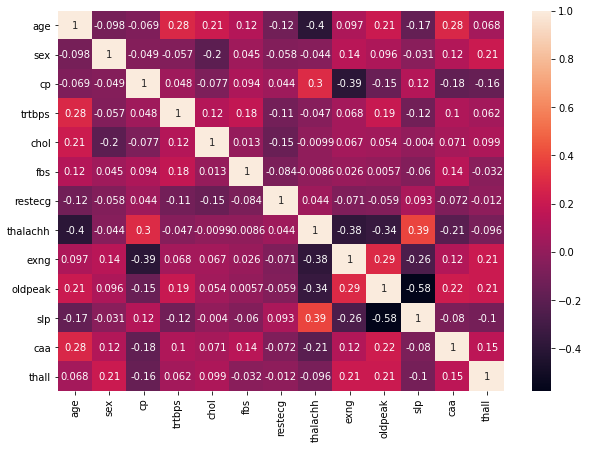

In [217]:
plt.figure(figsize=(10,7))
sns.heatmap(corr_mat,annot=True)
plt.show()

## Data Pre-Processing

### X - Independent Variables

In [218]:
X = dataset.drop(['output'],axis=1)
X.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


### y - Dependent Variable

In [219]:
y = dataset['output']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64

## Splitting Dataset Into Training and Testing Data

In [220]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X.values,y.values,test_size=0.2)

In [221]:
X_train.shape

(242, 13)

In [222]:
X_test.shape

(61, 13)

In [223]:
y_train.shape

(242,)

In [224]:
y_test.shape

(61,)

## Scaling Data

In [225]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train);

In [226]:
scaled_X_train

array([[ 0.50813846,  0.68313005, -0.88846927, ..., -0.67807487,
        -0.70247143,  1.1366664 ],
       [ 2.1789198 , -1.46385011,  0.07139485, ...,  0.9963549 ,
         0.2689462 , -0.52040148],
       [-1.60818457,  0.68313005,  1.99112309, ...,  0.9963549 ,
        -0.70247143,  1.1366664 ],
       ...,
       [-1.49679915,  0.68313005,  0.07139485, ...,  0.9963549 ,
        -0.70247143, -0.52040148],
       [ 0.84229473, -1.46385011, -0.88846927, ..., -0.67807487,
        -0.70247143, -0.52040148],
       [-0.38294492,  0.68313005, -0.88846927, ...,  0.9963549 ,
        -0.70247143,  1.1366664 ]])

In [227]:
scaled_X_test = scaler.transform(X_test)
scaled_X_test

array([[-1.49679915e+00, -1.46385011e+00,  1.03125897e+00,
        -1.09656693e+00,  3.89835023e-01, -4.18039809e-01,
        -1.00223951e+00,  1.00664598e+00,  1.37147817e+00,
        -8.87911273e-01,  9.96354904e-01, -7.02471427e-01,
        -5.20401484e-01],
       [-2.71559502e-01,  6.83130051e-01,  7.13948517e-02,
         1.34065940e-01, -9.26995199e-01, -4.18039809e-01,
         9.07539709e-01,  4.01300476e-01, -7.29140295e-01,
        -1.76111594e-01,  9.96354904e-01,  2.68946204e-01,
        -5.20401484e-01],
       [ 1.62199268e+00, -1.46385011e+00,  1.99112309e+00,
         4.69693088e-01, -1.80136267e-01, -4.18039809e-01,
         9.07539709e-01,  9.86277216e-02, -7.29140295e-01,
         7.13638005e-01,  9.96354904e-01,  1.24036383e+00,
        -5.20401484e-01],
       [ 1.73337811e+00,  6.83130051e-01,  1.03125897e+00,
         1.58845025e+00,  4.09489206e-01, -4.18039809e-01,
         9.07539709e-01, -1.58769191e+00,  1.37147817e+00,
         1.69236256e+00, -6.78074865e

### Total X Scaling

In [234]:
total_scaler = StandardScaler()
total_scaler.fit(X.values)
scaled_X = total_scaler.transform(X.values)

## Training Random Forest Model

In [228]:
from sklearn.ensemble import RandomForestClassifier as RFC

RFC_model = RFC()
RFC_model.fit(scaled_X_train,y_train)

RandomForestClassifier()

### Randeom Forest Model Score

In [229]:
print("Random Forest Heart Attack Model Score : {}".format(RFC_model.score(scaled_X_test,y_test)))

Random Forest Heart Attack Model Score : 0.8032786885245902


### Cross Validation Score

In [236]:
from sklearn.model_selection import cross_val_score

cross_val_score(RFC(),scaled_X,y.values,cv=5)

array([0.80327869, 0.86885246, 0.78688525, 0.8       , 0.8       ])

### Grid Search (Hyper-Parameter Tuning)

In [266]:
from sklearn.model_selection import GridSearchCV

RFC_grid_search = GridSearchCV(RFC(),{
    'n_estimators': [100,200,300,400,500],
    'max_depth': [10,5,3,2]
},cv=10,return_train_score=False)
RFC_grid_search.fit(scaled_X,y.values)

gs_df = pd.DataFrame(RFC_grid_search.cv_results_)
gs_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.102914,0.007479,0.004860,0.004541,10,100,"{'max_depth': 10, 'n_estimators': 100}",0.903226,0.806452,0.870968,0.866667,0.866667,0.800000,0.766667,0.866667,0.700000,0.800000,0.824731,0.058362,19
1,0.214203,0.018996,0.016839,0.004061,10,200,"{'max_depth': 10, 'n_estimators': 200}",0.903226,0.838710,0.838710,0.933333,0.866667,0.833333,0.766667,0.833333,0.733333,0.833333,0.838065,0.055022,10
2,0.301690,0.015064,0.019283,0.002598,10,300,"{'max_depth': 10, 'n_estimators': 300}",0.903226,0.806452,0.838710,0.933333,0.900000,0.833333,0.766667,0.833333,0.733333,0.766667,0.831505,0.062399,16
3,0.400957,0.020530,0.027364,0.003390,10,400,"{'max_depth': 10, 'n_estimators': 400}",0.870968,0.806452,0.838710,0.900000,0.866667,0.833333,0.733333,0.833333,0.733333,0.800000,0.821613,0.052403,20
4,0.534973,0.036476,0.035543,0.005067,10,500,"{'max_depth': 10, 'n_estimators': 500}",0.870968,0.838710,0.838710,0.900000,0.866667,0.833333,0.733333,0.833333,0.733333,0.833333,0.828172,0.051733,17


### Best Parameters For Model

In [267]:
df = gs_df[['param_n_estimators','param_max_depth','mean_test_score']]
df.loc[df['mean_test_score'] == df['mean_test_score'].max()]

,param_n_estimators,param_max_depth,mean_test_score
8,400,5,0.844839


## Training Support Vector Classifier

In [230]:
from sklearn.svm import SVC

SVC_model = SVC()
SVC_model.fit(scaled_X_train,y_train)

SVC()

### Support Vector Classifier Model Score

In [231]:
print("Support Vector Classifier Heart Attack Model Score : {}".format(SVC_model.score(scaled_X_test,y_test)))

Support Vector Classifier Heart Attack Model Score : 0.8360655737704918


### Cross Validation Score

In [237]:
from sklearn.model_selection import cross_val_score

cross_val_score(SVC(),scaled_X,y.values,cv=5)

array([0.80327869, 0.8852459 , 0.83606557, 0.83333333, 0.73333333])

### Grid Search (Hyper-Parameter Tuning)

In [268]:
SVC_grid_search = GridSearchCV(SVC(),{
    'C': range(1,10),
    'kernel': ['linear','poly','rbf','sigmoid']
},cv=10,return_train_score=False)

SVC_grid_search.fit(scaled_X,y.values)

svc_gs_df = pd.DataFrame(SVC_grid_search.cv_results_)
svc_gs_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001569,0.004706,0.001562,0.004687,1,linear,"{'C': 1, 'kernel': 'linear'}",0.870968,0.806452,0.870968,0.900000,0.900000,0.766667,0.900000,0.833333,0.7,0.733333,0.828172,0.069889,11
1,0.002218,0.004874,0.001564,0.004692,1,poly,"{'C': 1, 'kernel': 'poly'}",0.806452,0.806452,0.806452,0.933333,0.900000,0.766667,0.833333,0.766667,0.7,0.766667,0.808602,0.064504,18
2,0.000000,0.000000,0.003131,0.006261,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.838710,0.838710,0.838710,0.933333,0.866667,0.833333,0.833333,0.800000,0.7,0.800000,0.828280,0.055626,10
3,0.001562,0.004687,0.000000,0.000000,1,sigmoid,"{'C': 1, 'kernel': 'sigmoid'}",0.870968,0.838710,0.870968,0.900000,0.866667,0.833333,0.933333,0.833333,0.7,0.700000,0.834731,0.073453,1
4,0.005347,0.007000,0.000000,0.000000,2,linear,"{'C': 2, 'kernel': 'linear'}",0.870968,0.806452,0.870968,0.900000,0.900000,0.766667,0.933333,0.833333,0.7,0.733333,0.831505,0.073914,2


In [269]:
svc_df = svc_gs_df[['param_C','param_kernel','mean_test_score']]
svc_df.loc[svc_df['mean_test_score'] == svc_df['mean_test_score'].max()]

,param_C,param_kernel,mean_test_score
3,1,sigmoid,0.834731


## Training Naive Bayes Model

In [275]:
from sklearn.naive_bayes import GaussianNB

GNB_model = GaussianNB()
GNB_model.fit(scaled_X_train,y_train)

GaussianNB()

### Naive Bayes Model Score

In [276]:
print("Naive Bayes Model Score : {}".format(GNB_model.score(scaled_X_test,y_test)))

Naive Bayes Model Score : 0.819672131147541


### Grid Search (Hyper-Parameter Tuning)

In [278]:
GNB_grid_search = GridSearchCV(GaussianNB(),{},cv=10,return_train_score=False)

GNB_grid_search.fit(scaled_X,y.values)

GNB_gs_df = pd.DataFrame(GNB_grid_search.cv_results_)
GNB_gs_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001563,0.00469,0.0,0.0,{},0.806452,0.806452,0.870968,0.9,0.8,0.733333,0.9,0.8,0.733333,0.7,0.805054,0.066146,1


In [279]:
GNB_gs_df['mean_test_score']

0    0.805054
Name: mean_test_score, dtype: float64

## Selecting Random Forest AS Best Model

In [280]:
RFC_Model = RFC(n_estimators=400,max_depth=5)
RFC_Model.fit(scaled_X,y.values)

RandomForestClassifier(max_depth=5, n_estimators=400)

In [285]:
print("Tuned Random Forest Model Score : {}".format(RFC_model.score(total_scaler.transform(X_test),y_test)))

Tuned Random Forest Model Score : 0.8032786885245902


### Exporting Model AND Scaler

In [288]:
import joblib

joblib.dump(total_scaler,'input-scaler')

['input-scaler']

In [289]:
joblib.dump(RFC_Model,'heart-attack-prediction-model')

['heart-attack-prediction-model']